In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 读取两张图片
img1 = cv2.imread('004A.png')
img2 = cv2.imread('004A.png')
img1 = cv2.resize(img1, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
img2 = cv2.resize(img2, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)


# 将图片转换为灰度图
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [6]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

In [7]:
# FLANN匹配器的参数设置
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# 进行特征匹配
matches = flann.knnMatch(des1, des2, k=2)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\flann\src\miniflann.cpp:336: error: (-210:Unsupported format or combination of formats) in function 'cv::flann::buildIndex_'
> type=0
> 

In [ ]:
# 将匹配点转换为numpy数组
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# 使用RANSAC进行几何验证
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
inliers = mask.ravel().tolist()

# 绘制经过RANSAC筛选后的匹配结果
good_matches_inliers = [good_matches[i] for i in range(len(good_matches)) if inliers[i]]
img_matches_ransac = cv2.drawMatches(img1, kp1, img2, kp2, good_matches_inliers, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 显示经过RANSAC筛选后的匹配结果
plt.imshow(img_matches_ransac[:, :, ::-1])
plt.show()

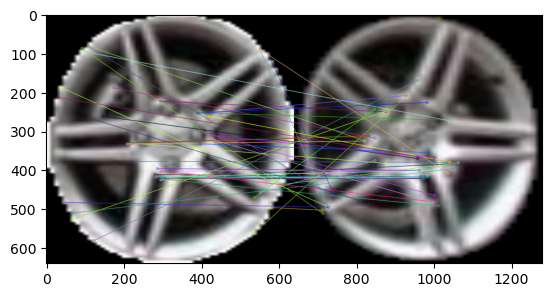

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
img1 = cv2.imread('004A.png')
img2 = cv2.imread('004A1.png')

# 将图片尺寸调整为 640x640
img1 = cv2.resize(img1, (640, 640), interpolation=cv2.INTER_LINEAR)
img2 = cv2.resize(img2, (640, 640), interpolation=cv2.INTER_LINEAR)

# 转换为灰度图
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 创建ORB对象
orb = cv2.ORB_create()

# 检测关键点和计算描述子
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# 使用BFMatcher进行特征匹配
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# 按照距离排序
matches = sorted(matches, key=lambda x: x.distance)

# 绘制前50个匹配点（可按需调整数量）
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 显示匹配结果
plt.imshow(img_matches[:, :, ::-1])
plt.show()

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
img1 = cv2.imread('004A.png')
img2 = cv2.imread('004A1.png')

# 将图片尺寸调整为 640x640
img1 = cv2.resize(img1, (640, 640), interpolation=cv2.INTER_LINEAR)
img2 = cv2.resize(img2, (640, 640), interpolation=cv2.INTER_LINEAR)

# 转换为灰度图
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

max_similarity = 0
best_angle = 0
best_matches = []

for angle in range(0, 61):
    # 获取图像中心
    center = (img2.shape[1] // 2, img2.shape[0] // 2)
    # 定义旋转矩阵
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    # 进行旋转
    img2_rotated = cv2.warpAffine(img2, M, (img2.shape[1], img2.shape[0]))
    gray2 = cv2.cvtColor(img2_rotated, cv2.COLOR_BGR2GRAY)

    # 创建ORB对象
    orb = cv2.ORB_create()

    # 检测关键点和计算描述子
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)

    # 使用BFMatcher进行特征匹配
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # 按照距离排序
    matches = sorted(matches, key=lambda x: x.distance)

    # 计算平均距离作为相似度的一种度量
    total_distance = sum([m.distance for m in matches])
    average_distance = total_distance / len(matches)
    similarity = 1 / (1 + average_distance)  # 相似度与平均距离成反比

    if similarity > max_similarity:
        max_similarity = similarity
        best_angle = angle
        best_matches = matches

print(f"最大相似度: {max_similarity}")
print(f"对应的旋转角度: {best_angle} 度")

# 绘制前50个匹配点（可按需调整数量）
img_matches = cv2.drawMatches(img1, kp1, img2_rotated, kp2, best_matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 显示匹配结果
plt.imshow(img_matches[:, :, ::-1])
plt.show()

最大相似度: 0.021729490022172948
对应的旋转角度: 58 度


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\features2d\src\draw.cpp:242: error: (-215:Assertion failed) i2 >= 0 && i2 < static_cast<int>(keypoints2.size()) in function 'cv::drawMatches'


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
img1 = cv2.imread('004A.png')
img2 = cv2.imread('004A1.png')

# 将图片尺寸调整为 640x640
img1 = cv2.resize(img1, (640, 640), interpolation=cv2.INTER_LINEAR)
img2 = cv2.resize(img2, (640, 640), interpolation=cv2.INTER_LINEAR)

# 转换为灰度图
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

max_similarity = 0
best_angle = 0
best_matches = []

for angle in range(0, 61):
    # 获取图像中心
    center = (img2.shape[1] // 2, img2.shape[0] // 2)
    # 定义旋转矩阵
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    # 进行旋转
    img2_rotated = cv2.warpAffine(img2, M, (img2.shape[1], img2.shape[0]))
    gray2 = cv2.cvtColor(img2_rotated, cv2.COLOR_BGR2GRAY)

    # 创建ORB对象
    orb = cv2.ORB_create()

    # 检测关键点和计算描述子
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)

    # 使用BFMatcher进行特征匹配
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # 按照距离排序
    matches = sorted(matches, key=lambda x: x.distance)

    # 计算平均距离作为相似度的一种度量
    total_distance = sum([m.distance for m in matches])
    average_distance = total_distance / len(matches)
    similarity = 1 / (1 + average_distance)  # 相似度与平均距离成反比

    if similarity > max_similarity:
        max_similarity = similarity
        best_angle = angle
        best_matches = matches

print(f"最大相似度: {max_similarity}")
print(f"对应的旋转角度: {best_angle} 度")

# 绘制匹配点，确保不超出索引范围
num_matches = min(50, len(best_matches))
img_matches = cv2.drawMatches(img1, kp1, img2_rotated, kp2, best_matches[:num_matches], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 显示匹配结果
plt.imshow(img_matches[:, :, ::-1])
plt.show()

最大相似度: 0.021729490022172948
对应的旋转角度: 58 度


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\features2d\src\draw.cpp:242: error: (-215:Assertion failed) i2 >= 0 && i2 < static_cast<int>(keypoints2.size()) in function 'cv::drawMatches'


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
img1 = cv2.imread('004A.png')
img2 = cv2.imread('004A1.png')

# 将图片尺寸调整为 640x640
img1 = cv2.resize(img1, (640, 640), interpolation=cv2.INTER_LINEAR)
img2 = cv2.resize(img2, (640, 640), interpolation=cv2.INTER_LINEAR)

# 转换为灰度图
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

max_similarity = 0
best_angle = 0
best_matches = []

for angle in range(0, 61):
    # 获取图像中心
    center = (img2.shape[1] // 2, img2.shape[0] // 2)
    # 定义旋转矩阵
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    # 进行旋转
    img2_rotated = cv2.warpAffine(img2, M, (img2.shape[1], img2.shape[0]))
    gray2 = cv2.cvtColor(img2_rotated, cv2.COLOR_BGR2GRAY)

    # 创建ORB对象
    orb = cv2.ORB_create()

    # 检测关键点和计算描述子
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)

    # 使用BFMatcher进行特征匹配
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # 按照距离排序
    matches = sorted(matches, key=lambda x: x.distance)

    # 计算平均距离作为相似度的一种度量
    total_distance = sum([m.distance for m in matches])
    average_distance = total_distance / len(matches)
    similarity = 1 / (1 + average_distance)  # 相似度与平均距离成反比

    if similarity > max_similarity:
        max_similarity = similarity
        best_angle = angle
        best_matches = matches

print(f"最大相似度: {max_similarity}")
print(f"对应的旋转角度: {best_angle} 度")

# 检查best_matches是否为空
if best_matches:
    num_matches = min(50, len(best_matches))
    img_matches = cv2.drawMatches(img1, kp1, img2_rotated, kp2, best_matches[:num_matches], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # 显示匹配结果
    plt.imshow(img_matches[:, :, ::-1])
    plt.show()
else:
    print("没有找到有效的匹配点，无法绘制匹配结果。")

最大相似度: 0.021729490022172948
对应的旋转角度: 58 度


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\features2d\src\draw.cpp:242: error: (-215:Assertion failed) i2 >= 0 && i2 < static_cast<int>(keypoints2.size()) in function 'cv::drawMatches'


In [ ]:
import cv2
import numpy as np

In [ ]:
def detect_circles(image):
    # 调整图片尺寸为100x100
    image = cv2.resize(image, (100, 100))

    # 转换为灰度图
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 中值滤波，相比高斯滤波，中值滤波在去除椒盐噪声的同时能更好地保留边缘
    blurred = cv2.medianBlur(gray, 3)

    # 自适应阈值处理，能更好地适应图像不同区域的光照变化
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # 查找轮廓
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    circle_centers = []
    # 遍历轮廓
    for contour in contours:
        # 计算轮廓的面积
        area = cv2.contourArea(contour)
        # 筛选合适面积范围的轮廓，可根据实际情况调整
        if 100 < area < 2000:
            # 计算轮廓的周长
            perimeter = cv2.arcLength(contour, True)
            # 计算轮廓的圆形度（圆形度接近1表示接近圆形）
            circularity = 4 * np.pi * area / (perimeter ** 2) if perimeter > 0 else 0
            # 设置圆形度的阈值，这里设为0.8，可根据实际情况调整
            if circularity > 0.8:
                # 找到最小外接圆
                (x, y), radius = cv2.minEnclosingCircle(contour)
                center = (int(x), int(y))
                circle_centers.append(center)
                radius = int(radius)

                # 绘制圆
                cv2.circle(image, center, radius, (0, 255, 0), 1)
                # 标记圆心
                cv2.circle(image, center, 2, (0, 0, 255), -1)

    return len(circle_centers), image

In [ ]:
def detect_and_match_features(img1, img2):
    # 更精细的图像预处理：去噪和光照校正（这里简单使用高斯滤波和直方图均衡化示例）
    img1 = cv2.GaussianBlur(img1, (5, 5), 0)
    img1 = cv2.equalizeHist(cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY))
    img2 = cv2.GaussianBlur(img2, (5, 5), 0)
    img2 = cv2.equalizeHist(cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY))

    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
    matches = bf.knnMatch(des1, des2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.6 * n.distance:  # 调整比率阈值
            good_matches.append(m)

    # 使用RANSAC算法去除错误匹配点
    if len(good_matches) >= 4:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        inliers = src_pts[mask.ravel() == 1]
        outlers = src_pts[mask.ravel() == 0]

        # 只保留内点作为最终的匹配点
        good_matches = [m for i, m in enumerate(good_matches) if mask.ravel()[i] == 1]
        src_pts = inliers
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    else:
        # 当匹配点数量不足4个时，赋空数组
        src_pts = np.array([]).reshape(-1, 1, 2)
        dst_pts = np.array([]).reshape(-1, 1, 2)

    return src_pts, dst_pts, good_matches

In [ ]:
def rotate_image(img, angle):
    height, width = img.shape[:2]
    center = (width // 2, height // 2)

    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, M, (width, height))

    return rotated_img

In [ ]:
def mark_spoke(img, pts, good_matches, kp1, kp2):
    if len(pts) > 0:
        center = np.mean(pts, axis=0).flatten()
        for i, pt in enumerate(pts):
            cv2.line(img, tuple(center.astype(int)), tuple(pt.flatten().astype(int)), (0, 0, 255), 2)
            # 绘制匹配点
            cv2.drawMarker(img, tuple(kp1[good_matches[i].queryIdx].pt), color=(255, 0, 0), markerType=cv2.MARKER_CROSS)
            cv2.drawMarker(img, tuple(kp2[good_matches[i].trainIdx].pt), color=(0, 255, 0), markerType=cv2.MARKER_CROSS)
    return img

In [ ]:
if __name__ == "__main__":
    img1 = cv2.imread('004A.png')
    img2 = cv2.imread('005A.png')
    img1 = cv2.resize(img1, (640, 640))
    img2 = cv2.resize(img2, (640, 640))

    if img1 is None or img2 is None:
        print("无法读取图像，请检查图像路径和文件名。")
    else:
        circle_count1, img1_with_circles = detect_circles(img1)
        circle_count2, img2_with_circles = detect_circles(img2)

        print(f"图1的圆心个数: {circle_count1}")
        print(f"图2的圆心个数: {circle_count2}")

        src_pts, dst_pts, good_matches = detect_and_match_features(img1, img2)

        best_angle = 0
        best_similarity = 0
        best_rotated_img2 = None

        # 从0度到60度寻找相似度最高的角度
        for angle in range(0, 61):
            rotated_img2 = rotate_image(img2, angle)
            _, temp_dst_pts, temp_good_matches = detect_and_match_features(img1, rotated_img2)
            similarity = len(temp_good_matches)  # 用匹配点数量作为相似度度量

            if similarity > best_similarity:
                best_similarity = similarity
                best_angle = angle
                best_rotated_img2 = rotated_img2
                dst_pts = temp_dst_pts
                good_matches = temp_good_matches

        print(f"相似度最高的角度: {best_angle} 度")
        print(f"最高相似度（匹配点数量）: {best_similarity}")

        marked_img = mark_spoke(best_rotated_img2, dst_pts, good_matches, kp1, kp2)

        cv2.imshow('Original Image 1 with Circles', img1_with_circles)
        cv2.imshow('Original Image 2 with Circles', img2_with_circles)
        cv2.imshow('Best Rotated Image 2', marked_img)

        if circle_count1 != circle_count2 or best_similarity < 10:  # 这里的10是根据实际情况调整的匹配点数量阈值
            print("改装")
        else:
            print("没有改装")

        cv2.waitKey(0)
        cv2.destroyAllWindows()